In [1]:
!pip install matplotlib

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sentiment Analysis에 필요한 패키지 Import 


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt --qq -y install fonts-NanumBarunGothic

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# 그래프에 retina display 적용

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  
fm._rebuild()

E: Command line option --qq is not understood in combination with the other options


구글 드라이브와 Colab을 연동합니다.

In [4]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

# 구글드라이브 마운트 

Mounted at /content/gdrive/


In [5]:
os.listdir('gdrive/My Drive/pytest')
# 지정된 경로에 파일을 출력 

['iris.csv',
 'test.csv',
 '김소월시.txt',
 '윤동주시.txt',
 'wiki_test.txt',
 'ratings_small.txt',
 'word2vec',
 'fra-eng',
 '네이버뉴스-생활문화_다중',
 'similarity',
 'kor-eng',
 'aclImdb_v1_small',
 'text_multi_we_model.h5',
 'text_multi_we_tokenizer.pickle',
 'text_binary_model.h5',
 'text_binary_tokenizer.pickle',
 'train_docs.json',
 '1CF29310',
 '크롤링 20000개.csv',
 'train_dfs.json',
 '학대별 라벨.xlsx',
 '학대별 라벨.csv',
 'stopwords-ko.txt',
 'best_model.h5',
 'Embedding_크롤링10000개.model',
 'Multi_train_docs.json',
 'Multi_model.json',
 'Multi_weight.h5',
 '위험별 척도 유형 200개씩.xlsx',
 '위험별 척도 유형 200개씩.csv',
 'danger_train_docs.json',
 'Multi_Embedding_크롤링10000개.model',
 'Multi_Embedding_위험 척도 200개.model',
 'Multi1_train_docs.json',
 'Multi1_Embedding_유형별.model',
 '학대 위험 척도 라벨_2.csv',
 '학대심각성 및 지속성_6분류_최종.xlsx',
 '피해아동_4분류.xlsx',
 '학대행위자_2분류.xlsx',
 'NLP(AI기수

In [6]:
df = pd.read_excel('gdrive/My Drive/pytest/학대행위자_2분류.xlsx')
# 지정된 구글드라이브의 파일을 불러오기 

In [7]:
df.isnull().sum()

번호       0
내용       0
Label    0
dtype: int64

In [8]:
df = df.drop(['번호'], axis = 1)

In [9]:
df.value_counts()

내용                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [10]:
df.columns

Index(['내용', 'Label'], dtype='object')

In [11]:
df['Label'].unique()
# 반응변수들의 고유한 범위를 파악 

array([1, 2])

In [12]:
df['Label'].value_counts()
# 이거 논문에 개수 적기 

2    307
1    305
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


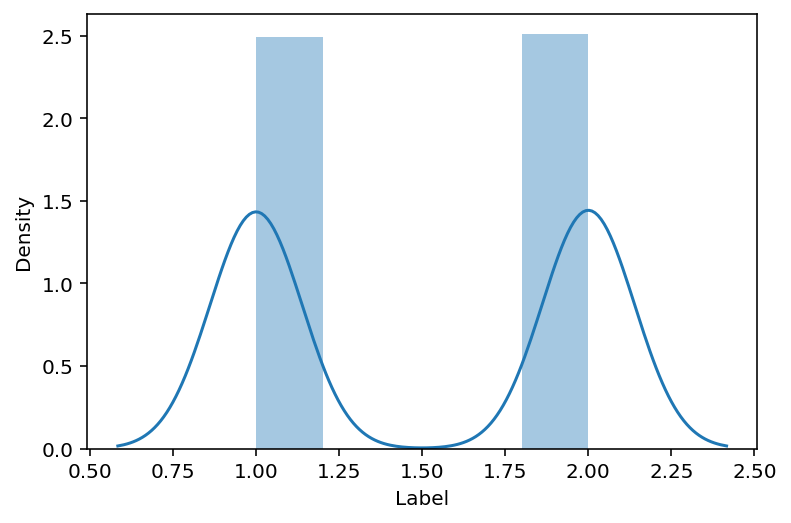

In [13]:
import seaborn as sns
sns.distplot(df.Label)

In [14]:
!apt-get update
!apt-get install g++ openjdk-8-jdk

#JDK Install 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [15]:

!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x


+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 27.4MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 

In [16]:
import konlpy
#konlpy.tag.Mecab().morphs('아버지가방에들어가신다')

In [17]:
'''
!pip install JPype1==0.7.4
!pip install rhinoMorph
'''

'\n!pip install JPype1==0.7.4\n!pip install rhinoMorph\n'

In [18]:
'''
import rhinoMorph
rn = rhinoMorph.startRhino()
'''

'\nimport rhinoMorph\nrn = rhinoMorph.startRhino()\n'

In [19]:
list1 = df.values.tolist()
# 불러왔던 df를 list형태로 변환해주며 list1이라는 객체에 저장 

In [20]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
        
    return doc

# 함수지정 
# 분석하고자 하는 텍스트에서 한글만을 추출 

In [21]:
def text_tokenizing(doc):
  return [word for word in okt.nouns(doc) if word not in SW and len(word) > 1]

In [ ]:
#def text_tokenizing(doc):
 # return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

In [ ]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [22]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

# 함수지정 
# 불용어사전을 만들어주는 함수(for문을 통해 set형태로 하나씩 넣어줌)

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')
# 지정한 함수를 활용하여 구글드라이브에 불용어를 넣어놓은 텍스트파일을 불러옴 

In [ ]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk

# # JDK Install 

In [ ]:
# !pip install JPype1==0.7.4
# !pip install rhinoMorph
# # JPype Install 
# # 형태소 분석기 Rhino 사용 

In [ ]:
# import rhinoMorph
# rn = rhinoMorph.startRhino()
# # 설치된 Rhino를 임포트하고 시작하는 명어 

In [ ]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [23]:
a = []
for i in SW:
  a.append(i.replace("\n",""))
# 지정된 불용어사전이 \n이 추가되어 있기때문에 없애주는 작업 

In [24]:
a
# \n이 없어진것을 확인 

['이 정도의',
 '가',
 '다시말하면',
 '답다',
 '양자',
 '좍좍',
 '어떠한',
 '뚝뚝',
 '비추어 보아',
 '하기보다는',
 '이천칠',
 '하고 있다',
 '에 있다',
 '오로지',
 '바로',
 '몇',
 '어찌',
 '심지어',
 '더욱이는',
 '혹은',
 '도달하다',
 '어떻하',
 '자기',
 '봐',
 '해요',
 '윙윙',
 '이천구',
 '보다더',
 '할수있다',
 '일곱',
 '함께',
 '그러니까',
 '거의',
 '그래서',
 '반드시',
 '어떤것들',
 '에서',
 '나',
 '만큼어찌됏든',
 '잠깐',
 '여기',
 '소생',
 '헐떡헐떡',
 '하게하다',
 '여섯',
 '이럴정도로',
 '만 못하다',
 '그리고',
 '셋',
 '헉',
 '쳇',
 '만큼',
 '아래윗',
 '도착하다',
 '바와같이',
 '할망정',
 '근거로',
 '이때',
 '견지에서',
 '각',
 '그위에',
 '총적으로 보면',
 '입각하여',
 '륙',
 '하기는한데',
 '한항목',
 '자기집',
 '칠',
 '운운',
 '여전히',
 '어찌됏든',
 '향하다',
 '한 후',
 '했어요',
 '할줄알다',
 '그런',
 '하곤하였다',
 '하려고하다',
 '만약',
 '본대로',
 '하기 위하여',
 '알 수 있다',
 '점에서 보아',
 '만이 아니다',
 '혹시',
 '근거하여',
 '좀',
 '네',
 '등',
 '년',
 '허걱',
 '한 까닭에',
 '로써',
 '그러 ',
 '이와 반대로',
 '삐걱거리다',
 '제외하고',
 '하는것만 못하다',
 '붕붕',
 '할지라도',
 '인 듯하다',
 '기점으로',
 '하자마자',
 '하지 않는다면',
 '위하여',
 '관한',
 '우리들',
 '누가 알겠는가',
 '툭',
 '육',
 '영차',
 '왜냐하면',
 '거바',
 '다섯',
 '동시에',
 '생각한대로',
 '인젠',
 '대해서',
 '안 그러면',
 '대해 말하자면',
 '따위',
 '이로 인하

In [25]:
SW = set(a)

In [ ]:
#SW = SW.add('\n')

In [26]:
list1

[['신고하려는이유는 담임선생님께서 우리반에들중 중간고사평균보다 기말고사평균이 떨어진에들을 순서없이 나오라고한다음 이건좀심하다 싶을 정도로 온힘을다 해때리셨습니다\xa0\xa0그런데 다른에들은 자기가나갔는데 저만불려나가서 맞았습니다. 나중에 들어보니 다른에들보다\xa0더세게맞았다하더라고요그리고 이렇게성적이네려갔다고 패는건아니라고생각합니다 이유는이렇고신고하는법좀자세하게알려주세요 인테넷을뒤져보니 자세하게는 안나와있더라고요',
  1],
 ['아동폭행처벌 합의가 안되네요..술 먹고 어린아이를 쳤어요하도 시끄럽게 굴어서 부모한테 한마디 하려는데부모도 시끄럽게..떠들고 있어서 애한테 뭐라 했습니다애는 들은 척도 안 하길래 저는 옆으로 가라면서옆으로 친다는 게...제가 담배를 가지고 있던 손이라애 볼에 담배재가 스쳤어요이 상황을 부모가 보고 아동폭행처벌을 받게 할거라고 하면서합의는 안 해줄 거라고 하는데 어떡하면 좋을까요..',
  1],
 ['정서적 피해를 주어 아동복지법 위반으로 검찰 넘어간후, 지난 주 형사조정을 했습니다.합의금 400을 요구하였고 교사(피의자)와 원장(참고인) 각각 200씩 내라고해서 동의했고 4월 5일까지 주기로하며 피해자는 고소취하서에 날짜칸만 비우고 사인하여 냈습니다.피의자인 교사는 현재 기소중지 상태라 신원조회시 기소중지가 뜨기때문에 취직을못하고있는 상황입니다.피의자는 합의금 200을 날짜안에 입금햇고, 참고인은 피해자에게 사정을말해 5월까지 내기로 조정실나와서 따로 얘기가 됐습니다.1.피해자가 형사조정 후에 며칠지나 합의금금액을 더올려받겟다고할수잇나요? 이를 받아들여주는지요?피의자가 이미 합의금 반을 줫는데 피해자가 갑자기 그냥 합의안하고 민사가겟다 하면 받아들여주나요?2. 합의금을 입금한 피의자인 교사는 먼저 기소중지가 풀리고 기소유예로 갈수잇나요? 참고인까지 다 완납해야가능한가요?3. 검찰청민원실에 문의했을땐 돈을 다 주고안주고를 떠나서 형사조정날 합의하겟다고 되었으면 그 서류를 담당검사에게 넘겨 기소유예일지 아닐지 판단받는다고햇는데 

In [27]:
#텍스트 클리닝과 텍스트 토큰화
# from konlpy.tag import Mecab
# from konlpy.tag import Kkma
# from konlpy.tag import 
from konlpy.tag import Okt 
import json
import os
import re
from pprint import pprint

okt = Okt()
# mecab = Mecab()
# kkma = Kkma()

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt') # 불용어들을 SW에 저장 


if os.path.exists('train_okt_4.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("train_okt_4.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data =[(text_tokenizing(text_cleaning(line[0])), line[1])for line in list1 if text_tokenizing(text_cleaning(line[0]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("train_okt_4.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# if os.path.exists('test_docs.json'):
#     with open("test_docs.json", encoding='utf-8') as f:
#         test_data = json.load(f)
# else:
#     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
#     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
#     with open("test_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# pprint(train_data[0])
# pprint(test_data[0])

In [28]:
len(train_data)

612

In [29]:
train_data[:10]

[(['신고',
   '이유',
   '담임',
   '선생님',
   '우리',
   '중간고사',
   '평균',
   '기말고사',
   '평균',
   '순서',
   '다음',
   '이건',
   '정도',
   '다른',
   '자기',
   '나중',
   '다른',
   '들보',
   '성적',
   '건아',
   '생각',
   '이유',
   '신고',
   '법좀'],
  1),
 (['아동',
   '폭행',
   '처벌',
   '합의',
   '요술',
   '부모',
   '한마디',
   '부모',
   '척도',
   '게제',
   '담배',
   '가지',
   '담배',
   '상황',
   '부모',
   '보고',
   '아동',
   '폭행',
   '처벌',
   '합의'],
  1),
 (['정서',
   '피해',
   '주어',
   '아동복지법',
   '위반',
   '검찰',
   '지난',
   '형사',
   '조정',
   '합의금',
   '요구',
   '교사',
   '피의자',
   '원장',
   '참고인',
   '각각',
   '동의',
   '주기',
   '피해자',
   '소취',
   '하서',
   '날짜',
   '사인',
   '피의자',
   '교사',
   '현재',
   '기소',
   '중지',
   '상태',
   '원조',
   '회시',
   '중지',
   '때문',
   '취직',
   '상황',
   '피의자',
   '합의금',
   '날짜',
   '입금',
   '참고인',
   '피해자',
   '사정',
   '내기',
   '정실',
   '얘기',
   '피해자',
   '형사',
   '조정',
   '며칠',
   '지나',
   '합의금',
   '금액',
   '피의자',
   '합의금',
   '줫는데',
   '피해자',
   '갑자기',
   '그냥',
   '합의',
   '민사',
   '합의금',
   '입금',
   '피의

In [30]:
import nltk 
total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

40196


In [31]:
text = nltk.Text(total_tokens, name = 'token')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(30))

5368
[('아이', 748),
 ('엄마', 636),
 ('아빠', 542),
 ('신고', 536),
 ('선생님', 501),
 ('아동학대', 326),
 ('친구', 317),
 ('정도', 292),
 ('생각', 285),
 ('학교', 266),
 ('아동', 257),
 ('지금', 246),
 ('사람', 242),
 ('경찰', 239),
 ('소리', 223),
 ('그냥', 214),
 ('머리', 213),
 ('저희', 202),
 ('학생', 202),
 ('처벌', 200),
 ('조사', 196),
 ('시간', 188),
 ('진짜', 188),
 ('동생', 187),
 ('상황', 183),
 ('정말', 175),
 ('부모님', 163),
 ('공부', 150),
 ('관련', 143),
 ('문제', 143)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

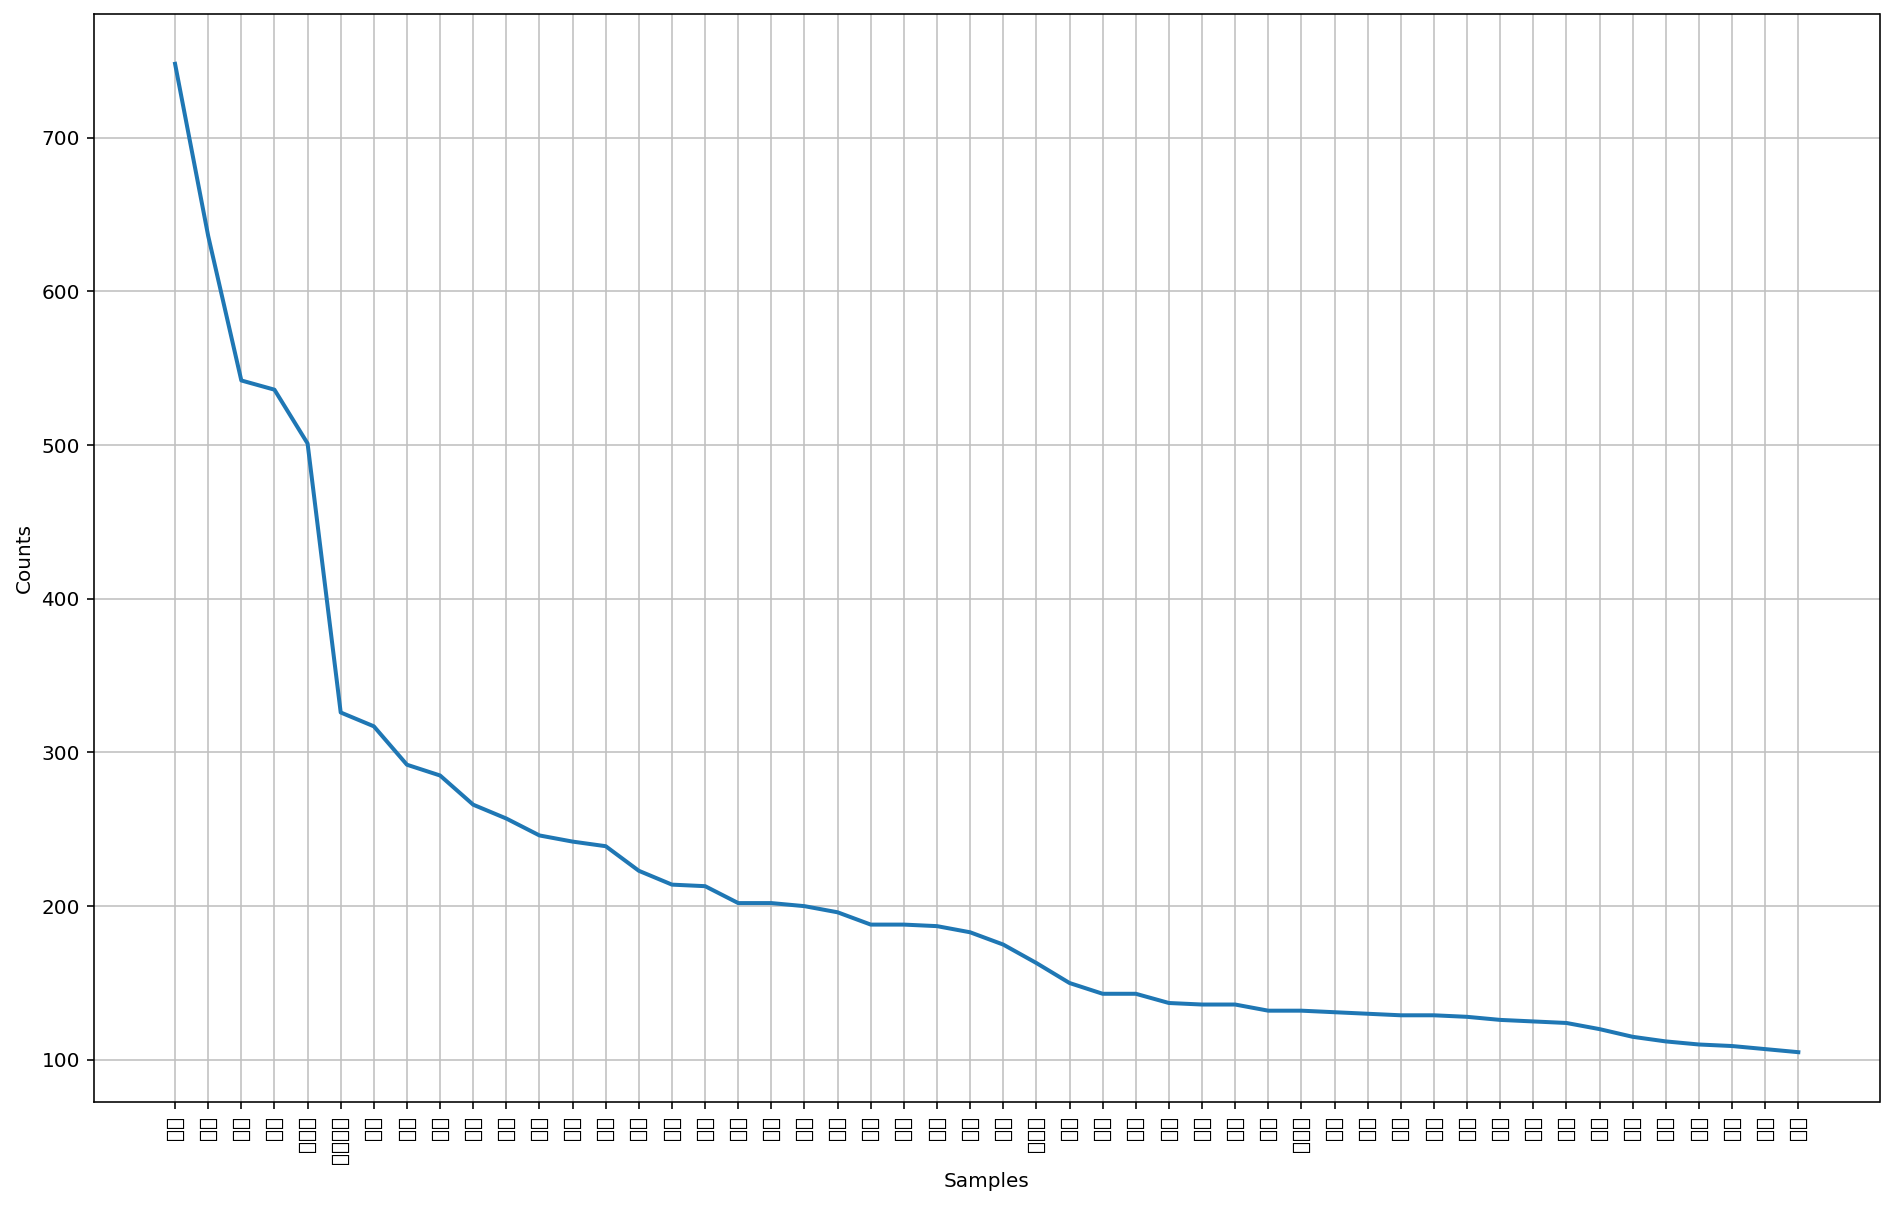

In [32]:
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc 
%matplotlib inline

plt.figure(figsize = (16, 10))
text.plot(50)

In [33]:
Senti = []
for line in train_data:
  Senti.append(line[1])
# 반응변수를 for문을 통해서 Senti라는 새롭게 만든 리스트에 넣어줌

In [34]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)
# Senti의 컬럼이름을 변경해줌 

In [35]:
labels = Senti['Label']
# labels에 Senti를 저장 
classes = sorted(labels.unique())
# classes에 Senti의 고유한 값을 저장 

In [36]:
label_to_cat = dict()
# 빈 딕셔너리 생성 

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

# for문을 사용하여 Label을 더미변수로 변환 

label_to_cat

{1: array([1, 0], dtype=int8), 2: array([0, 1], dtype=int8)}

In [37]:
Senti.Label

0      1
1      1
2      1
3      1
4      1
      ..
607    2
608    2
609    2
610    2
611    2
Name: Label, Length: 612, dtype: int64

In [38]:
Text = []
for line in train_data:
  Text.append(line[0])

In [39]:
y = np.array([label_to_cat[label] for label in Senti.Label])
# 변환된 것을 for문을 사용하여 array형태로 y에 저장 

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors


In [41]:
embeddings = Word2Vec(size=200, min_count=3, window = 3, sg =1) #최소빈도 3이상/ 주변단어 포함 범위, sg가 1이면 skip-gram이고 0이면 CBOW
embeddings.build_vocab([sentence for sentence in Text])
embeddings.train([sentence for sentence in Text],
                 total_examples=embeddings.corpus_count,
                 epochs=embeddings.epochs)

(156009, 200980)

In [42]:
embeddings.save('위험척도유형_학대행위자적용.model')
print('완료')

완료


In [43]:
vocab = dict(embeddings.wv.most_similar('상처'))

In [44]:
X = embeddings[vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

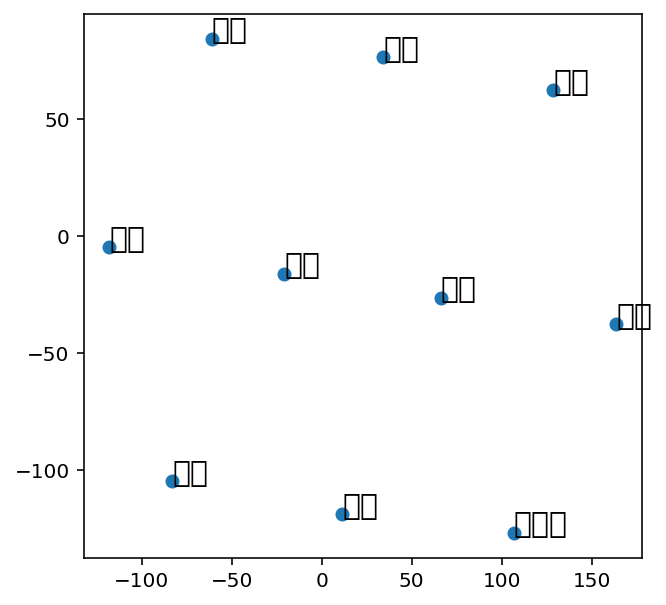

In [46]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(5, 5)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos,fontsize=15)
    
plt.show()

In [47]:
def encode_sentence_lstm(tokens, emb_size):
    vec = np.zeros((170, 200))
    # vec의 길이는 170이고 한 토큰의 의미를 설명하기 위한 vector가 200
    for i, word in enumerate(tokens):
        if i > 169:
            break
        try:
            vec[i] = embeddings.wv[word].reshape((1, emb_size))
        except KeyError:
            continue
    return vec

In [48]:
from sklearn.model_selection import train_test_split

X = np.array([encode_sentence_lstm(ele, 200) for ele in map(lambda x: x, Text)])

train_text, test_text, train_senti, test_senti = train_test_split(X, y, stratify = y)

In [50]:
train_text.shape

(459, 170, 200)

In [51]:
print(len(train_text))
print(len(train_senti))
print(len(test_text))
print(len(test_senti))

459
459
153
153


In [52]:
import keras.utils
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout,Conv1D,MaxPooling1D
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.layers import  Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [53]:
max_words = 1000
max_len = 170
Batch_size = 32
Epochs = 50

In [54]:
train_text.shape

(459, 170, 200)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 170, 200)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 170, 64)           12864     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 85, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5440)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               696448    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0     

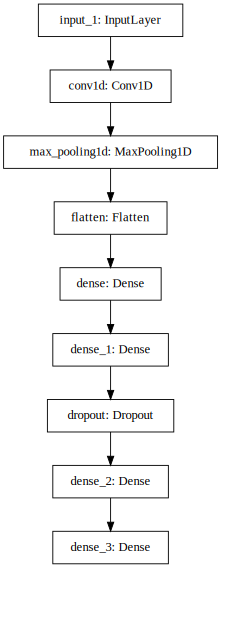

In [55]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
# create the model
input_tensor = Input(shape=(170,200))
embedding_vecor_length = 32
model = Sequential()
x = Conv1D(filters = 64, kernel_size = 1, strides = 1, padding = 'valid', activation = 'relu')(input_tensor)
x = MaxPooling1D(pool_size = 2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)



output_tensor = Dense(2, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()

In [56]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
15/15 [==============================] - 3s 145ms/step - loss: 0.6965 - accuracy: 0.5662 - val_loss: 0.6973 - val_accuracy: 0.5033
Epoch 2/50
15/15 [==============================] - 0s 29ms/step - loss: 0.6865 - accuracy: 0.5354 - val_loss: 0.6675 - val_accuracy: 0.7582
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.6606 - accuracy: 0.6668 - val_loss: 0.5682 - val_accuracy: 0.8170
Epoch 4/50
15/15 [==============================] - 0s 27ms/step - loss: 0.5938 - accuracy: 0.7116 - val_loss: 0.5263 - val_accuracy: 0.7516
Epoch 5/50
15/15 [==============================] - 0s 28ms/step - loss: 0.5115 - accuracy: 0.8208 - val_loss: 0.5079 - val_accuracy: 0.7712
Epoch 6/50
15/15 [==============================] - 0s 28ms/step - loss: 0.6112 - accuracy: 0.7127 - val_loss: 0.4411 - val_accuracy: 0.8497
Epoch 7/50
15/15 [==============================] - 0s 31ms/step - loss: 0.4285 - accuracy: 0.8362 - val_loss: 0.4314 - val_accuracy: 0.8431
Epoch 8/50
1

In [58]:
print(test_text.shape)
print(len(test_senti))

(153, 170, 200)
153


In [59]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

5/5 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.7974


In [60]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.5257015824317932
Test Accuracy: 0.7973856329917908


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


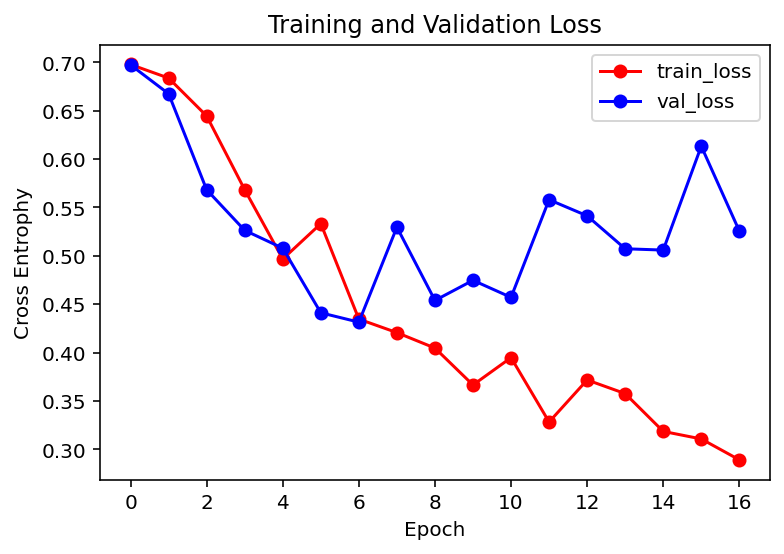

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
# doc = input()
# #엄마가 내몸을 만지고 아빠가 나를 때렸어요.

In [ ]:
# def sentiment_predict1(new_sentence):
#     if new_sentence != '':
#         new_sentence1 = text_cleaning(new_sentence)
#         new_sentence2 = text_tokenizing(new_sentence1)
#         new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
#         if new_sentence3 != []:
#             X = np.array([encode_sentence_lstm(new_sentence3,200)])
#             pred_probs = model.predict(X) # 예측
            
#             categories = ['피해아동 학대 심각성 및 지속성','피해아동의 욕구 및 특성', '생활 환경']

#             N = len(categories)

#             values = np.round(pred_probs, 3).flatten().tolist()

            
#             plt.bar(categories, values)

#             plt.show()

In [ ]:
# sentiment_predict1(doc)

LSTM

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 170, 200)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, 400)               641600    
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1040

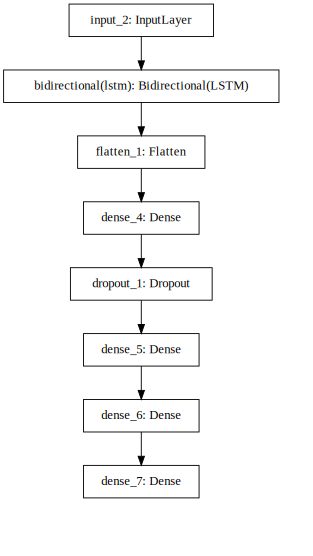

In [63]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
# create the model
input_tensor = Input(shape=(170,200))
model = Sequential()
x = Bidirectional(LSTM(200))(input_tensor) # recurrent_dropout = 0.1
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation = 'sigmoid')(x)
x = Dense(16, activation = 'relu')(x)



output_tensor = Dense(2, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()



In [64]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
15/15 [==============================] - 21s 1s/step - loss: 0.7480 - accuracy: 0.5025 - val_loss: 0.6926 - val_accuracy: 0.5098
Epoch 2/50
15/15 [==============================] - 15s 979ms/step - loss: 0.6970 - accuracy: 0.4588 - val_loss: 0.6918 - val_accuracy: 0.4967
Epoch 3/50
15/15 [==============================] - 15s 979ms/step - loss: 0.6918 - accuracy: 0.5339 - val_loss: 0.6903 - val_accuracy: 0.5621
Epoch 4/50
15/15 [==============================] - 14s 963ms/step - loss: 0.6895 - accuracy: 0.5609 - val_loss: 0.6983 - val_accuracy: 0.5033
Epoch 5/50
15/15 [==============================] - 15s 978ms/step - loss: 0.6952 - accuracy: 0.5343 - val_loss: 0.6916 - val_accuracy: 0.5098
Epoch 6/50
15/15 [==============================] - 14s 964ms/step - loss: 0.6918 - accuracy: 0.5220 - val_loss: 0.6860 - val_accuracy: 0.4967
Epoch 7/50
15/15 [==============================] - 15s 977ms/step - loss: 0.6829 - accuracy: 0.5557 - val_loss: 0.6696 - val_accuracy: 0.5686
Ep

In [66]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

5/5 [==============================] - 1s 288ms/step - loss: 0.6900 - accuracy: 0.4967


In [67]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.6900403499603271
Test Accuracy: 0.49673202633857727


LSTM + CNN

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 170, 200)]        0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 170, 128)          128128    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 85, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               526400    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040

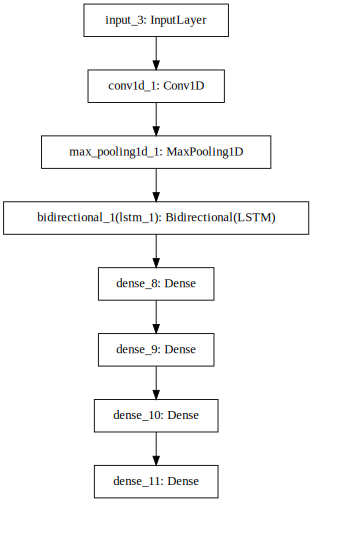

In [68]:
# create the model
input_tensor = Input(shape=(170,200))
model = Sequential()
x = Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu')(input_tensor)
x = MaxPooling1D(pool_size = 2)(x)
x = Bidirectional(LSTM(200))(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation='relu')(x)


output_tensor = Dense(2, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()


from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()

In [69]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [70]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
15/15 [==============================] - 13s 670ms/step - loss: 0.6950 - accuracy: 0.5174 - val_loss: 0.6936 - val_accuracy: 0.5033
Epoch 2/50
15/15 [==============================] - 9s 586ms/step - loss: 0.6928 - accuracy: 0.5097 - val_loss: 0.6902 - val_accuracy: 0.7124
Epoch 3/50
15/15 [==============================] - 9s 592ms/step - loss: 0.6911 - accuracy: 0.5843 - val_loss: 0.6856 - val_accuracy: 0.5098
Epoch 4/50
15/15 [==============================] - 9s 588ms/step - loss: 0.6767 - accuracy: 0.5940 - val_loss: 0.6230 - val_accuracy: 0.6928
Epoch 5/50
15/15 [==============================] - 9s 590ms/step - loss: 0.7017 - accuracy: 0.6192 - val_loss: 0.6431 - val_accuracy: 0.6601
Epoch 6/50
15/15 [==============================] - 9s 588ms/step - loss: 0.6457 - accuracy: 0.6262 - val_loss: 0.6673 - val_accuracy: 0.5817
Epoch 7/50
15/15 [==============================] - 9s 586ms/step - loss: 0.6248 - accuracy: 0.6491 - val_loss: 0.5035 - val_accuracy: 0.7843
Epoch

In [71]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

5/5 [==============================] - 1s 156ms/step - loss: 0.6911 - accuracy: 0.5490


In [72]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.6910890340805054
Test Accuracy: 0.5490196347236633
